#### Obtener la id de un usuario, y demás información de su cuenta:

In [1]:
#Al subirlo borrar credenciales
consumer_key = 'op0OAH0QMQXq0Y6XlkJTnoElI'
consumer_secret = 'ooEWMXTNE3iW5haSblRDgyhtd9BaRiFEUj3LwkOcPfSlcoMIhS'
access_token = '1482691214457679875-o6QQ8CCC1JyrioZD9AYuuotkKLwUlO'
access_token_secret = 'TMfE7N6pVzFWg0GZU3neJQDcpoZTKsVEMT3cHCHH3YVTb'
bearer_token = 'AAAAAAAAAAAAAAAAAAAAAMS3YAEAAAAAuB87A6k3FtJOuZ3VvHjb2PejM0o%3DSxkAFxHNTYniGQ15oLKkxkVCECshZd7NTjbRk9DIUsx686NSgO'

In [2]:
import requests
a = requests.get("https://api.twitter.com/2/users/by/username/TwitterDev",headers= {'Authorization': "Bearer "+bearer_token})
a.json()

{'data': {'id': '2244994945', 'name': 'Twitter Dev', 'username': 'TwitterDev'}}

In [3]:
def get_data(url):
    headers = {'Authorization': "Bearer " + bearer_token }
    response = requests.get(url, headers=headers)
    response_data = response.json()
    return response_data

In [4]:
cuentas = ['JomaSport', 'Panter_Calzado', 'Callaghan_Shoes', 'pikolinos', 'CalzadoPitillos','MAGRITshoes',
           'CalzadosRobusta','DianCalzado','FalSeguridad','pmcalzado','AlpeWomanShoes','DrCutillas',
           'MartinelliShoes','snipe_shoes','GARVALIN', 'NaturalWorldEco','DAngelaShoes','LuisGonzaloShoe',
          'CalzadosSegarra', 'calzadomiralles']


In [743]:
get_data("https://api.twitter.com/2/users/by/username/MartinelliShoes?expansions=pinned_tweet_id&user.fields=created_at&tweet.fields=created_at")

{'data': {'username': 'MartinelliShoes',
  'created_at': '2009-08-20T08:59:19.000Z',
  'id': '67268648',
  'name': 'Martinelli'}}

#### Obtener los tweets

In [744]:
import tweepy
client = tweepy.Client(bearer_token=bearer_token)
tweets = client.get_users_tweets(id= '67268648', max_results= 15)

In [745]:
id = []
text = []
innov = []
for tweet in tweets.data:
    id.append(tweet.id)
    text.append(tweet.text)
    innov.append('')

import pandas as pd
dict = {'id': id, 'text': text, 'innov':innov} 
df = pd.DataFrame(dict) 
#df.to_csv('tweets.csv')

#### Leer y preprocesar datos

In [8]:
import pandas as pd
def read_data(doc):
    dataset = pd.read_csv(doc,sep=',')
    texts = list(dataset['text'])
    return texts

In [9]:
texts = read_data('tw')

In [10]:
#import re
#import string
#import emoji
#from nltk.tokenize import word_tokenize
#from nltk.corpus import stopwords
#def preprocesamiento(p):
#    frases = ''
#    for f in p:
#        frases += f
#    frases = frases.lower()
#    #p = [i.lower() for i in p] #Pasamos todo a minúsculas
#    frases = re.sub(r"http\S+|www\S+|https\S+",'',frases)
#    #p = [re.sub(r"http\S+|www\S+|https\S+",'',i) for i in p] #Eliminamos urls
#    frases = re.sub(r'\@\w+|\#','',frases)
#    #p = [re.sub(r'\@\w+|\#','',i) for i in p] #Eliminamos menciones y hastag
#    frases = frases.translate(str.maketrans('','',string.punctuation))
#    #p = [i.translate(str.maketrans('','',string.punctuation)) for i in p] #Eliminamos signos de puntuación
#    frases = emoji.get_emoji_regexp().sub(r'', frases)
#    #p = [emoji.get_emoji_regexp().sub(r'', i) for i in p] #Omitimos emojis
#    tokens = word_tokenize(frases)
#    #p_tokens = [word_tokenize(i) for i in p] #Tokenizamos
#    words = []
#    for n,t in enumerate(tokens):
#        if not t in stopwords.words('spanish'):
#            words.append(t)
#    wd = []
#    from nltk.stem import SnowballStemmer
#    for w in words:
#        spanish_stemmer = SnowballStemmer('spanish')
#        wd.append(spanish_stemmer.stem(w))
#    return(wd)

In [11]:
#def preprocesamiento2(p):
#    text = []
#    innov = []
#    for frases in p:
#        frases = frases.lower()
#        #p = [i.lower() for i in p] #Pasamos todo a minúsculas
#        frases = re.sub(r"http\S+|www\S+|https\S+",'',frases)
#        #p = [re.sub(r"http\S+|www\S+|https\S+",'',i) for i in p] #Eliminamos urls
#        frases = re.sub(r'\@\w+|\#','',frases)
#        #p = [re.sub(r'\@\w+|\#','',i) for i in p] #Eliminamos menciones y hastag
#        frases = frases.translate(str.maketrans('','',string.punctuation))
#        #p = [i.translate(str.maketrans('','',string.punctuation)) for i in p] #Eliminamos signos de puntuación
#        frases = emoji.get_emoji_regexp().sub(r'', frases)
#        #p = [emoji.get_emoji_regexp().sub(r'', i) for i in p] #Omitimos emojis
#        tokens = word_tokenize(frases)
#        #p_tokens = [word_tokenize(i) for i in p] #Tokenizamos
#        words = []
#        for n,t in enumerate(tokens):
#            words.append([])
#            for w in t:
#                if not w in stopwords.words('spanish'):
#                    words[n].append(w)
#        text.append(frases)
#    import pandas as pd
#    dict = {'text': text} 
#    df = pd.DataFrame(dict) 
#    df.to_csv('tw')              

In [12]:
import csv
import pandas as pd
import numpy as np

In [13]:
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

In [671]:
import string
import re
import emoji
from nltk.corpus import stopwords
punctuation = set(string.punctuation) | {'¿','¡'}
def tokenize(sentence):
    tokens = []
    sentence = sentence.lower()
    sentence = re.sub(r"http\S+|www\S+|https\S+",'',sentence)
    sentence = re.sub(r'\@\w+|\#','',sentence)
    sentence = emoji.get_emoji_regexp().sub(r'', sentence)
    sentence = re.sub(r'nuevas','nueva',sentence)
    sentence = re.sub(r'nuevos','nueva',sentence)
    sentence = re.sub(r'[^a-zA-Zñ\s]', '', normalize(sentence)) #para tener en cuenta números añadir 0-9
    for token in sentence.split():
        new_token = []
        for character in token:
            if character not in punctuation:
                new_token.append(character)
        #if new_token and token not in stopwords.words('spanish'):
        if new_token and token not in [normalize(i) for i in stopwords.words('spanish')]:
            tokens.append("".join(new_token))
    return tokens
def tokenize2(texto):
    l = []
    for j in range(len(texto)):
        s = ''
        for i in tokenize(texto[j]):
            s = s+' '+i
        l.append(s)
    return l

In [597]:
# Ejemplo procesamiento

In [598]:
texts[729]

'¡¡¡NUEVA COLECCIÓN!!! 🎈\nSal a la calle, nuevas aventuras te están esperando... descubre, investiga, explora 🚀\n➡️ https://t.co/590L9joLsC https://t.co/kMDKVgn3TS'

In [599]:
tokenize2([texts[729]])

[' nueva coleccion sal calle nueva aventuras esperando descubre investiga explora']

###### Confusion matrix

In [600]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(8, 8))
    sns.heatmap(conf_matrix, annot=True,fmt="d");
    plt.title("Matriz de confusión")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))

   # DATOS  NO BALANCEADOS

In [601]:
x =pd.read_csv('tw')
x

,Unnamed: 0,id,text,innov,cuenta
0,1,1493183145214152711,¿Y si por #SanValentín le envías esta imagen a...,0,JomaSport
1,2,1493133271659651072,RT @bbmarathon: Seguimos con buenas noticias 🤩...,0,JomaSport
2,3,1491761617998127110,😍 #JomaTeam \n#SoloporDeporte https://t.co/8Aq...,0,JomaSport
3,4,1491687933665026049,@MXiaoPodium @rfetm_tenismesa @galiadvorak Fue...,0,JomaSport
4,5,1491671037238554625,PODIO!!!!\n\n#JomaTeam #ElCorazónDeEspaña http...,0,JomaSport
...,...,...,...,...,...
995,996,1456676472387735553,Zapatillas súper bonitas de @doctorcutillas de...,0,calzadomiralles
996,997,1456314237383581705,All you need is love 🎤 ❤\n\n¿Cuál es para ti l...,0,calzadomiralles
997,998,1456208540687818755,"¿Zapatos para pies con juanetes, dedos de mart...",0,calzadomiralles
998,999,1455951833722130435,Te vas a poner las #botas\n\n#calzadosmiralles...,0,calzadomiralles


In [602]:
x["text"].apply(tokenize)

0                   [sanvalentin, envias, imagen, crush]
1      [rt, seguimos, buenas, noticias, bilbao, bizka...
2                             [jomateam, solopordeporte]
3      [placer, tener, dos, jugadoras, olimpicas, ins...
4                   [podio, jomateam, elcorazondeespaña]
                             ...                        
995    [zapatillas, super, bonitas, calzadosmiralles,...
996    [all, you, need, is, love, cancion, popular, m...
997    [zapatos, pies, juanetes, dedos, martillo, anc...
998    [vas, poner, botas, calzadosmiralles, zapateri...
999    [buenos, dias, mañana, hoy, compartimos, zapat...
Name: text, Length: 1000, dtype: object

### Proporción innovación y no innovación

In [603]:
(sum(x['innov'] == 1))

90

In [604]:
sum(x['innov'] == 0)

910

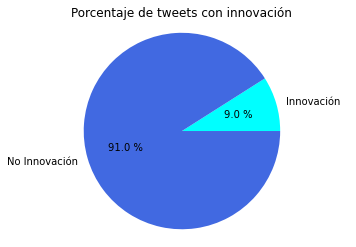

In [605]:
import matplotlib.pyplot as plt
tweets = [90,910]
nombres = ["Innovación","No Innovación"]
colores = ['#00FFFF','#4169E1']
plt.pie(tweets, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.title('Porcentaje de tweets con innovación')
plt.show()

In [606]:
#colores
#import matplotlib
#for cname, hex in matplotlib.colors.cnames.items():
#    print(cname,hex)

### vector de características y particiones (train/test)

In [607]:
#Ejemplo vector características

In [608]:
fr = []
fr.append('Evita accidentes en tu trabajo con tu nuevo calzado')
fr.append(' Nueva colección disponible en tu zapatería')
fr.append(' Te presentamos el nuevo modelo. Cómodo y elegante.')

In [609]:
f = tokenize2(fr)
f

[' evita accidentes trabajo nuevo calzado',
 ' nueva coleccion disponible zapateria',
 ' presentamos nuevo modelo comodo elegante']

In [610]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(f)
voc = vectorizer.get_feature_names_out()
X.toarray()
voc

array(['accidentes', 'calzado', 'coleccion', 'comodo', 'disponible',
       'elegante', 'evita', 'modelo', 'nueva', 'nuevo', 'presentamos',
       'trabajo', 'zapateria'], dtype=object)

In [611]:
df = pd.DataFrame(X.toarray())
df = df.set_axis([voc], axis=1)
df.to_csv('myfile.csv')

In [612]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(tokenize2(x["text"]), x["innov"], stratify=x["innov"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 750, testing examples 250


In [613]:
from sklearn.feature_extraction.text import CountVectorizer
def vec_caract(train_text,test_text):
    real_vectorizer = CountVectorizer()
    train_X = real_vectorizer.fit_transform(train_text)
    test_X = real_vectorizer.transform(test_text)
    voc = real_vectorizer.get_feature_names_out()
    return(train_X,test_X,voc)

In [614]:
matriz = train_X.toarray()

In [615]:
#Cantidad de palabras que solo aparecen una vez
sum(np.einsum('ij->j', matriz) ==1)

1848

In [616]:
import numpy as np
def eliminar(train_X,voc):
    elim = []
    for n,v in enumerate(np.einsum('ij->j', train_X.toarray()) ==1):
        if v == True:
            elim.append(n)

    for n,v in enumerate(voc):
        if len(v) <=2:
            elim.append(n)

    elim = np.unique(elim)        
    v = np.delete(voc,elim)
    return(v,elim)

In [617]:
train_X,test_X,voc = vec_caract(train_text,test_text)
v, elim = eliminar(train_X,voc)

In [618]:
train = np.delete(train_X.toarray(), elim, axis=1)

In [619]:
test = np.delete(test_X.toarray(), elim, axis=1)

In [620]:
#Obtener en las frases que aparece una palabra
#vectorizer = CountVectorizer()
#X = vectorizer.fit_transform(frases)
#voc = vectorizer.get_feature_names_out()
#for i in range(len(frases)):
#    print(X.toarray()[i][0])

# medir algoritmos

In [621]:
from sklearn.model_selection import train_test_split
def split(n):
    train_text, test_text, train_labels, test_labels = train_test_split(tokenize2(x["text"]), x["innov"], train_size = n, stratify=x["innov"])
    return(train_text, test_text, train_labels, test_labels)

import time
import matplotlib.pyplot as plt
mnbb = MultinomialNB()
sizes = [2,100,200,300,400,500,600,700,998]
times = []
for n in sizes:
    train_text, test_text, train_labels,test_labels = split(n)
    train_X,test_X,voc = vec_caract(train_text,test_text)
    start = time.perf_counter()
    mnb.fit(train_X, train_labels)
    end = time.perf_counter()
    times.append(end - start)
plt.plot(sizes,times)
plt.xlabel('Tamaño conjunto entrenanmiento')
plt.ylabel('Tiempo')
plt.title('Coste algorítmico Naive Bayes')
plt.show()

## Modelos

### Naive Bayes

In [622]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
mnb = MultinomialNB()
#mnb.fit(train_X.toarray(), train_labels)
mnb.fit(train, train_labels)
#y_pred = mnb.predict(test_X.toarray())
y_pred = mnb.predict(test)
#print("Number of mislabeled points out of a total %d points : %d"
 #     % (test_text.shape[0], (test_labels != y_pred).sum()))
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.4%}")
auc = roc_auc_score(test_labels, y_pred)
print(f"Auc: {auc:.4%}")

Accuracy: 91.6000%
Auc: 62.5399%


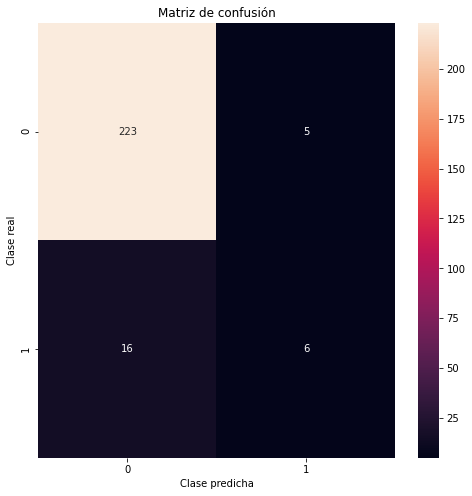

              precision    recall  f1-score   support

           0       0.93      0.98      0.96       228
           1       0.55      0.27      0.36        22

    accuracy                           0.92       250
   macro avg       0.74      0.63      0.66       250
weighted avg       0.90      0.92      0.90       250



In [623]:
mostrar_resultados(test_labels, y_pred)

### Soporte vectores

In [624]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svc = LinearSVC(C= 1, class_weight = 'balanced') #Indicamos que las clases están desbalanceadas
#svc.fit(train_X, train_labels)
#pred = svc.predict(test_X)
svc.fit(train, train_labels)
pred = svc.predict(test)
accuracy = accuracy_score(test_labels, pred)
print(f"Accuracy: {accuracy:.4%}")
auc = roc_auc_score(test_labels, pred)
print(f"Auc: {auc:.4%}")

Accuracy: 92.8000%
Auc: 67.3046%


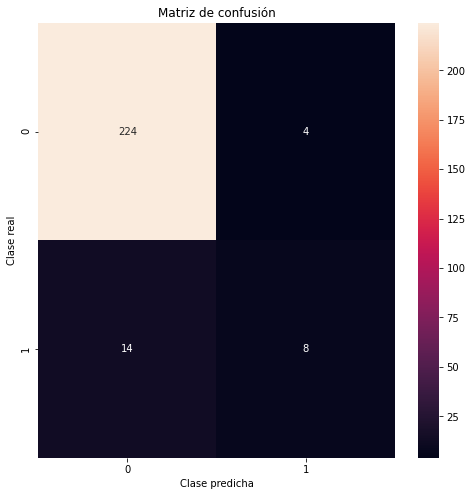

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       228
           1       0.67      0.36      0.47        22

    accuracy                           0.93       250
   macro avg       0.80      0.67      0.72       250
weighted avg       0.92      0.93      0.92       250



In [625]:
mostrar_resultados(test_labels, pred)

import time
import matplotlib.pyplot as plt
svc = LinearSVC(C= 1, class_weight = 'balanced')
sizes = [10,100,200,300,400,500,600,700,998]
times = []
for n in sizes:
    train_text, test_text, train_labels,test_labels = split(n)
    train_X,test_X,voc = vec_caract(train_text,test_text)
    start = time.perf_counter()
    svc.fit(train_X, train_labels)
    end = time.perf_counter()
    times.append(end - start)
plt.plot(sizes,times)
plt.xlabel('Tamaño conjunto entrenanmiento')
plt.ylabel('Tiempo')
plt.title('Coste algorítmico Soporte Vectores')
plt.show()

In [626]:
n = svc.fit(train, train_labels)
len(n.coef_[0])

1102

In [627]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

In [647]:
top_cinco = []

for r in range(6):  # Número de veces que ejecutamos este bucle
    maximo = max(dic, key = dic.get)  # Buscamos el máximo valor
    top_cinco.append(maximo)  # Lo añadimos a una nueva lista
    del dic[maximo]  # Lo eliminamos de la lista antigua, para que el próximo "máximo valor" no incluya este valor

#print(top_cinco)
top_cinco = ['novedades', 'nueva','clientes', 'exigentes', 'bien']

In [648]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

p = {}
for i in top_cinco:
    p[i] = dic[i]

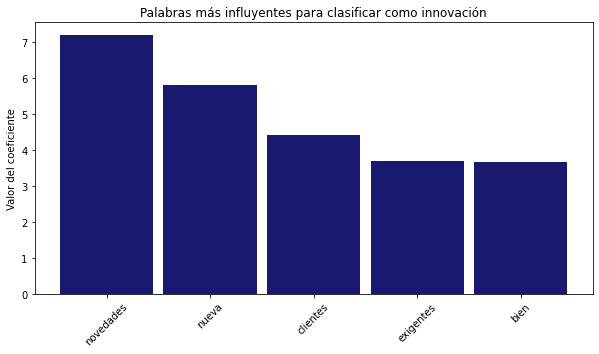

In [649]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset

courses = list(p.keys())
values = list(p.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='#191970',
		width = 0.9)

plt.xlabel("")
plt.ylabel("Valor del coeficiente")
plt.title("Palabras más influyentes para clasificar como innovación")
plt.xticks(rotation = 45)
plt.show()

### Regresión logística

In [631]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=20, class_weight = 'balanced', n_jobs = 4) #Indicamos que las clases están desbalanceadas
#lr.fit(train_X, train_labels)
#pred2 = lr.predict(test_X)
lr.fit(train, train_labels)
pred2 = lr.predict(test)
accuracy2 = accuracy_score(test_labels, pred2)
print(f"Accuracy: {accuracy2:.4%}")
lr_auc = roc_auc_score(test_labels, pred2)
print(f"Auc: {lr_auc:.4%}")

Accuracy: 92.8000%
Auc: 69.3581%


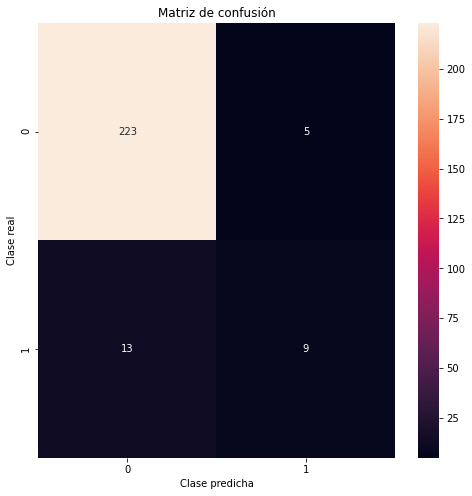

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       228
           1       0.64      0.41      0.50        22

    accuracy                           0.93       250
   macro avg       0.79      0.69      0.73       250
weighted avg       0.92      0.93      0.92       250



In [632]:
mostrar_resultados(test_labels, pred2)

import time
import matplotlib.pyplot as plt
lr =  LogisticRegression(C=20, class_weight = 'balanced', n_jobs = 4)
sizes = [10,100,200,300,400,500,600,700,998]
times = []
for n in sizes:
    train_text, test_text, train_labels,test_labels = split(n)
    train_X,test_X,voc = vec_caract(train_text,test_text)
    start = time.perf_counter()
    lr.fit(train_X, train_labels)
    end = time.perf_counter()
    times.append(end - start)
plt.plot(sizes,times)
plt.xlabel('Tamaño conjunto entrenanmiento')
plt.ylabel('Tiempo')
plt.title('Coste algorítmico Regresión Logística')
plt.show()

### Palabras que más influyen

In [633]:
n = lr.fit(train, train_labels)
len(n.coef_[0])

1102

In [634]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

In [635]:
top_cinco = []

for r in range(13):  # Número de veces que ejecutamos este bucle
    maximo = max(dic, key = dic.get)  # Buscamos el máximo valor
    top_cinco.append(maximo)  # Lo añadimos a una nueva lista
    del dic[maximo]  # Lo eliminamos de la lista antigua, para que el próximo "máximo valor" no incluya este valor
#print(top_cinco)
top_cinco = ['novedades', 'nueva', 'presentar', 'medida', 'necesidades']

In [636]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

p = {}
for i in top_cinco:
    p[i] = dic[i]

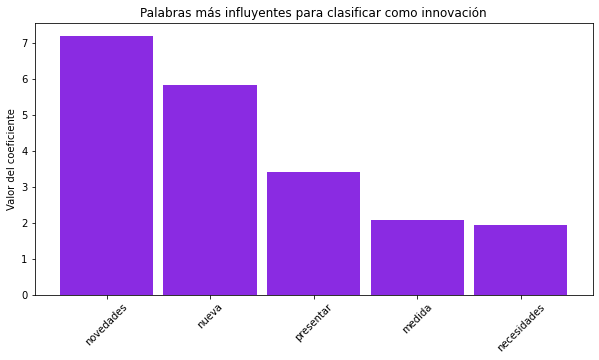

In [637]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset

courses = list(p.keys())
values = list(p.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='#8A2BE2',
		width = 0.9)

plt.xlabel("")
plt.ylabel("Valor del coeficiente")
plt.title("Palabras más influyentes para clasificar como innovación")
plt.xticks(rotation = 45)
plt.show()

### CURVA ROC

In [638]:
from sklearn.metrics import roc_curve
def plot_roc_curve(fper, tper, fper1, tper1, fper2, tper2):
    fig = plt.figure(figsize = (10, 5))
    plt.plot(fper, tper, color='red', label='Regresión Logística')
    plt.plot(fper1,tper1, color = 'blue', label = 'Soporte Vectores')
    plt.plot(fper2,tper2, color = 'yellow', label = 'Naive Bayes')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('Ratio Falsos Positivos')
    plt.ylabel('Ratio Verdaderos Positivos')
    plt.title('Curva ROC')
    plt.legend()
    plt.show()

In [639]:
fper, tper, thresholds = roc_curve(test_labels, pred2)
fper1, tper1, thresholds1 = roc_curve(test_labels, pred)
fper2, tper2, thresholds2 = roc_curve(test_labels, y_pred)

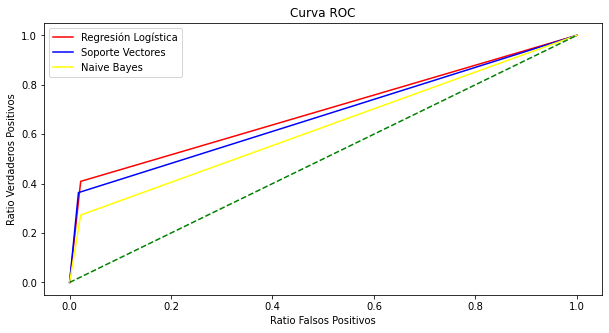

Auc Regresión Logística: 69.3581%
Auc Soporte Vectores: 67.3046%
Auc Naive Bayes: 62.5399%


In [640]:
plot_roc_curve(fper, tper,fper1, tper1,fper2, tper2)

lr_auc = roc_auc_score(test_labels, pred2)
print(f"Auc Regresión Logística: {lr_auc:.4%}")
svc_auc = roc_auc_score(test_labels, pred)
print(f"Auc Soporte Vectores: {svc_auc:.4%}")
nb_auc = roc_auc_score(test_labels, y_pred)
print(f"Auc Naive Bayes: {nb_auc:.4%}")

# DATOS BALANCEADOS

In [660]:
#bal =pd.read_csv('data_balanceado')
#bal["text"].apply(tokenize)

#from sklearn.model_selection import train_test_split
#train_text, test_text, train_lab, test_lab = train_test_split(tokenize2(bal["text"]), bal["innov"], stratify=bal["innov"])
#print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

#real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
#train_X = real_vectorizer.fit_transform(train_text)
#test_X = real_vectorizer.transform(test_text)

#train_text = tokenize2(train['text'])
#train_lab = train['innov']
#test_text = tokenize2(test['text'])
#test_lab = test['innov']
#real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
#train_X = real_vectorizer.fit_transform(train_text)
#test_X = real_vectorizer.transform(test_text)
#train =pd.read_csv('tr_bal')
#test = pd.read_csv('te')

In [672]:
from sklearn.model_selection import train_test_split
train_text, test_text, train_labels, test_labels = train_test_split(tokenize2(x["text"]), x["innov"], stratify=x["innov"])
print(f"Training examples: {len(train_text)}, testing examples {len(test_text)}")

Training examples: 750, testing examples 250


In [687]:
#real_vectorizer = CountVectorizer(tokenizer = tokenize, binary=True)
real_vectorizer = CountVectorizer()
train_X = real_vectorizer.fit_transform(train_text)
test_X = real_vectorizer.transform(test_text)

In [688]:
voc = real_vectorizer.get_feature_names_out()
len(voc)

2918

In [689]:
matriz = train_X.toarray()

In [690]:
elim = []
for n,v in enumerate(np.einsum('ij->j', matriz) ==1):
    if v == True:
        elim.append(n)

for n,v in enumerate(voc):
    if len(v) <=2:
        elim.append(n)

elim = np.unique(elim)        
v = np.delete(voc,elim)

In [691]:
train = np.delete(train_X.toarray(), elim, axis=1)
test = np.delete(test_X.toarray(), elim, axis=1)

In [692]:
#train = np.delete(train, elim1, axis=1)
#test = np.delete(test, elim1, axis=1)

In [693]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(train, train_labels)

In [694]:
sum(y_res == 0)

683

In [695]:
sum(y_res == 1)

683

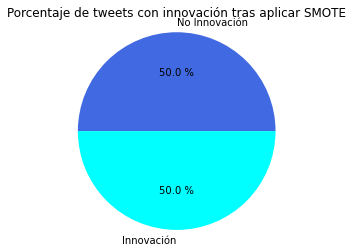

In [696]:
import matplotlib.pyplot as plt
tweets = [682,682]
nombres = ["No Innovación","Innovación"]
colores = ['#4169E1','#00FFFF']
plt.pie(tweets, labels=nombres, autopct="%0.1f %%", colors=colores)
plt.axis("equal")
plt.title('Porcentaje de tweets con innovación tras aplicar SMOTE')
plt.show()

## Modelos

### Naive Bayes

In [697]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score
mnbb = MultinomialNB()
#y_pred = mnbb.fit(train_X.toarray(), train_lab).predict(test_X.toarray())
y_pred = mnbb.fit(X_res, y_res).predict(test)
#print("Number of mislabeled points out of a total %d points : %d"
 #    % (test_text.shape[0], (test_lab != y_pred).sum()))
accuracy = accuracy_score(test_labels, y_pred)
print(f"Accuracy: {accuracy:.4%}")
lr_auc = roc_auc_score(test_labels, y_pred)
print(f"Auc: {lr_auc:.4%}")

Accuracy: 85.2000%
Auc: 74.2674%


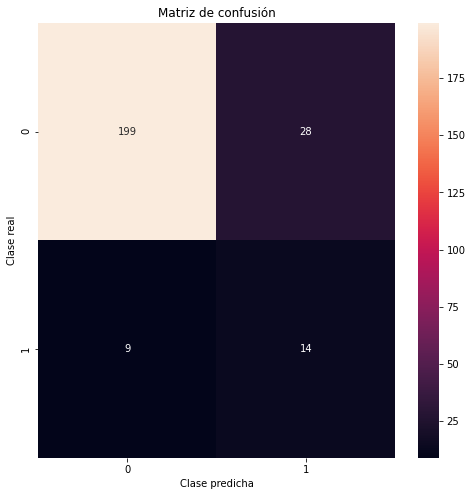

              precision    recall  f1-score   support

           0       0.96      0.88      0.91       227
           1       0.33      0.61      0.43        23

    accuracy                           0.85       250
   macro avg       0.65      0.74      0.67       250
weighted avg       0.90      0.85      0.87       250



In [698]:
mostrar_resultados(test_labels, y_pred)

from sklearn.naive_bayes import GaussianNB
gnbb = GaussianNB()
y_pred = gnbb.fit(train_X.toarray(), train_lab).predict(test_X.toarray())
#y_pred = gnbb.fit(train, train_lab).predict(test)
#print("Number of mislabeled points out of a total %d points : %d"
#% (test_text.shape[0], (test_lab != y_pred).sum()))
accuracy = accuracy_score(test_lab, y_pred)
print(f"Accuracy: {accuracy:.4%}")
lr_auc = roc_auc_score(test_lab, y_pred)
print(f"Auc: {lr_auc:.4%}")

### Soporte vectores

In [699]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
svcb = LinearSVC(C= 1, class_weight = 'balanced') #Indicamos que las clases están desbalanceadas
#svcb.fit(train_X, train_lab)
#pred = svcb.predict(test_X)
svcb.fit(X_res, y_res)
pred = svcb.predict(test)
accuracy = accuracy_score(test_labels, pred)
print(f"Accuracy: {accuracy:.4%}")
from sklearn.metrics import roc_auc_score
lr_auc = roc_auc_score(test_labels, pred)
print(f"Auc: {lr_auc:.4%}")

Accuracy: 77.6000%
Auc: 64.2214%


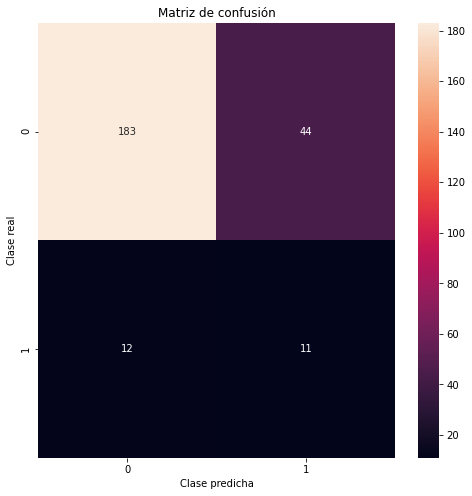

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       227
           1       0.20      0.48      0.28        23

    accuracy                           0.78       250
   macro avg       0.57      0.64      0.57       250
weighted avg       0.87      0.78      0.81       250



In [700]:
mostrar_resultados(test_labels, pred)

In [701]:
n = svc.fit(X_res, y_res)
len(n.coef_[0])

1149

In [702]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

In [703]:
top_cinco = []

for r in range(5):  # Número de veces que ejecutamos este bucle
    maximo = max(dic, key = dic.get)  # Buscamos el máximo valor
    top_cinco.append(maximo)  # Lo añadimos a una nueva lista
    del dic[maximo]  # Lo eliminamos de la lista antigua, para que el próximo "máximo valor" no incluya este valor

#print(top_cinco)
top_cinco = ['novedades', 'presentar', 'nueva', 'comfort', 'conocer']

In [704]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

p = {}
for i in top_cinco:
    p[i] = dic[i]

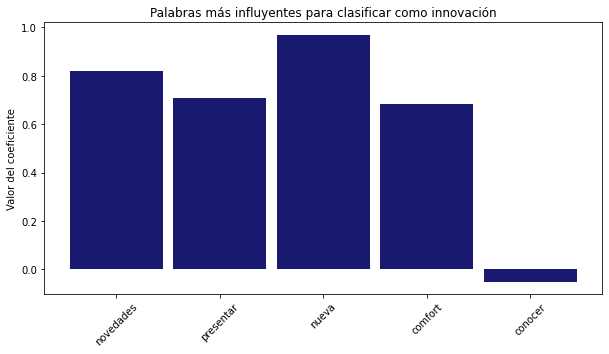

In [705]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset

courses = list(p.keys())
values = list(p.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='#191970',
		width = 0.9)

plt.xlabel("")
plt.ylabel("Valor del coeficiente")
plt.title("Palabras más influyentes para clasificar como innovación")
plt.xticks(rotation = 45)
plt.show()

### Regresión logística

In [706]:
from sklearn.linear_model import LogisticRegression
lrb = LogisticRegression(C=1,class_weight = 'balanced', n_jobs = 4) #Indicamos que las clases están desbalanceadas
#lrb.fit(train_X, train_lab)
#pred2 = lrb.predict(test_X)
lrb.fit(X_res, y_res)
pred2 = lrb.predict(test)
accuracy2 = accuracy_score(test_labels, pred2)
print(f"Accuracy: {accuracy2:.4%}")
lr_auc = roc_auc_score(test_labels, pred2)
print(f"Auc: {lr_auc:.4%}")

Accuracy: 80.0000%
Auc: 67.4966%


In [707]:
n = lr.fit(X_res, y_res)
len(n.coef_[0])

1149

In [708]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

In [709]:
top_cinco = []

for r in range(5):  # Número de veces que ejecutamos este bucle
    maximo = max(dic, key = dic.get)  # Buscamos el máximo valor
    top_cinco.append(maximo)  # Lo añadimos a una nueva lista
    del dic[maximo]  # Lo eliminamos de la lista antigua, para que el próximo "máximo valor" no incluya este valor

#print(top_cinco)
top_cinco = ['novedades', 'nueva', 'presentar','membrana', 'comfort']

In [710]:
dic = {}
for r,i in enumerate(v):
    dic[i] = n.coef_[0][r]

p = {}
for i in top_cinco:
    p[i] = dic[i]

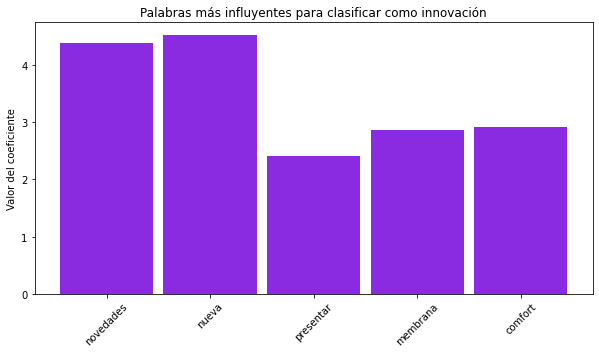

In [711]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset

courses = list(p.keys())
values = list(p.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='#8A2BE2',
		width = 0.9)

plt.xlabel("")
plt.ylabel("Valor del coeficiente")
plt.title("Palabras más influyentes para clasificar como innovación")
plt.xticks(rotation = 45)
plt.show()

In [712]:
n.intercept_

array([1.93700383])

In [713]:
#FALTA VER SI SE MEJORA RESULTADOS PROCESANDO EL TEXTO, PERO DE MOMENTO ----> RESULTADOS UN POCO MALOS 


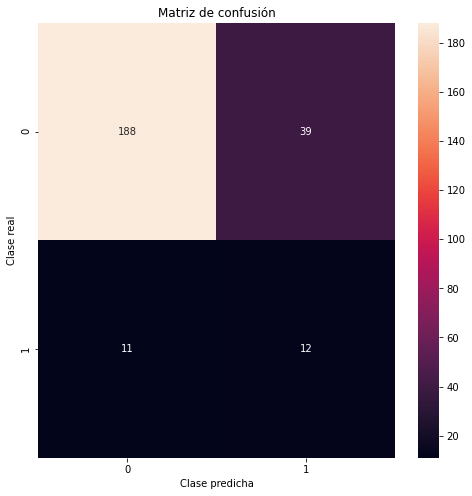

              precision    recall  f1-score   support

           0       0.94      0.83      0.88       227
           1       0.24      0.52      0.32        23

    accuracy                           0.80       250
   macro avg       0.59      0.67      0.60       250
weighted avg       0.88      0.80      0.83       250



In [714]:
mostrar_resultados(test_labels, pred2)

### ROC Curve

In [715]:
fper, tper, thresholds = roc_curve(test_labels, pred2)
fper1, tper1, thresholds1 = roc_curve(test_labels, pred)
fper2, tper2, thresholds2 = roc_curve(test_labels, y_pred)

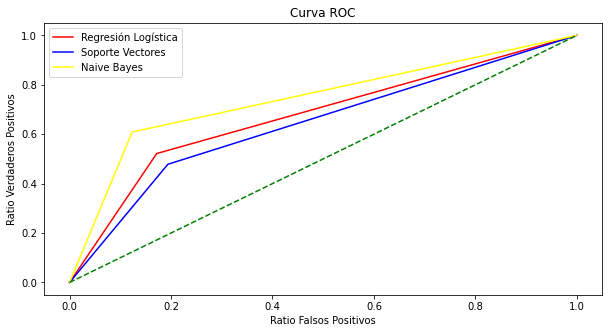

Auc Regresión Logística: 67.4966%
Auc Soporte Vectores: 64.2214%
Auc Naive Bayes: 74.2674%


In [716]:
plot_roc_curve(fper, tper,fper1, tper1,fper2, tper2)

lr_auc = roc_auc_score(test_labels, pred2)
print(f"Auc Regresión Logística: {lr_auc:.4%}")
svc_auc = roc_auc_score(test_labels, pred)
print(f"Auc Soporte Vectores: {svc_auc:.4%}")
nb_auc = roc_auc_score(test_labels, y_pred)
print(f"Auc Naive Bayes: {nb_auc:.4%}")

In [717]:
frases = ['Hola, os traigo la nueva colección de moda en zapatillas', 'Hoy juega el Real Madrid. Mucha suerte!',
          'Si tu pie está feliz, tú estás feliz','La novedad más nueva de esta colección que estabáis esperando', '¿Has mirado ya la nueva colección? No te pierdas las novedades que traemos en tacones']

In [718]:
preds = ['mnb','svc', 'lr', 'mnbb', 'svcb', 'lrb']

In [719]:
#Predicción con Naive Bayes
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(frases))
predicciones = mnbb.predict(frases_X)
for text,innov in zip(frases,predicciones):
    print(f"{innov:5}-{text}")

    1-Hola, os traigo la nueva colección de moda en zapatillas
    1-Hoy juega el Real Madrid. Mucha suerte!
    0-Si tu pie está feliz, tú estás feliz
    1-La novedad más nueva de esta colección que estabáis esperando
    1-¿Has mirado ya la nueva colección? No te pierdas las novedades que traemos en tacones


In [720]:
#Predicción con máquinas soporte vectores
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(frases))
predicciones = svcb.predict(frases_X.toarray())
for text,innov in zip(frases,predicciones):
    print(f"{innov:5}-{text}")

    1-Hola, os traigo la nueva colección de moda en zapatillas
    1-Hoy juega el Real Madrid. Mucha suerte!
    0-Si tu pie está feliz, tú estás feliz
    1-La novedad más nueva de esta colección que estabáis esperando
    1-¿Has mirado ya la nueva colección? No te pierdas las novedades que traemos en tacones


In [721]:
#Predicción con regresión logística
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(frases))
predicciones = lr.predict(frases_X.toarray())
for text,innov in zip(frases,predicciones):
    print(f"{innov:5}-{text}")

    1-Hola, os traigo la nueva colección de moda en zapatillas
    1-Hoy juega el Real Madrid. Mucha suerte!
    0-Si tu pie está feliz, tú estás feliz
    1-La novedad más nueva de esta colección que estabáis esperando
    1-¿Has mirado ya la nueva colección? No te pierdas las novedades que traemos en tacones


In [722]:
#Predicción con regresión logística
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(frases))
predicciones = svcb.predict(frases_X.toarray())
for text,innov in zip(frases,predicciones):
    print(f"{innov:5}-{text}")

    1-Hola, os traigo la nueva colección de moda en zapatillas
    1-Hoy juega el Real Madrid. Mucha suerte!
    0-Si tu pie está feliz, tú estás feliz
    1-La novedad más nueva de esta colección que estabáis esperando
    1-¿Has mirado ya la nueva colección? No te pierdas las novedades que traemos en tacones


In [742]:
#Predicción naive bayes balanceado
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(df['text']))
predicciones = mnbb.predict(frases_X.toarray())
for text,innov in zip(df['text'],predicciones):
    print(f"{innov:5}-{text}")

    0-RT @YorokobuMag: De lejos parece asqueroso, pero de cerca es 😍😍😍https://t.co/AXPOx6PBOT
    1-La nueva colección está repleta de modelos versátiles y atemporales, ¿La has visto ya? https://t.co/pptY8IsRnl #ecofriendly #vegan #shoesaddict
    0-😍😍😍 https://t.co/AVeWZCSV1K
    0-La belleza de la fabricación artesanal https://t.co/pptY8IsRnl #artesania https://t.co/hdH7XB6nqp
    0-La primera comunión es un acontecimiento único que los peques recordarán toda su vida, ¿Sabes que tienes que tener en cuenta a la hora de elegirlo? ¡Te lo contamos! https://t.co/BAvUkaDBvr #primeracomunión https://t.co/cp3G8oEUV3
    0-Nuestro calzado implica un proceso de fabricación sobre un tejido natural de manera artesanal por lo que  cualquier irregularidad es parte de su característica😍 https://t.co/pptY8IsRnl https://t.co/HIJtWx78oQ
    0-RT @JuanjoLara01: Me ha dado por pensar que cada círculo encierra una historia. https://t.co/8Rgtm5RHDw
    0-¡Porque madre no hay que una y se lo merece todo! 1

In [727]:
#Predicción naive bayes balanceado
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(df['text']))
predicciones = mnbb.predict(frases_X.toarray())
for text,innov in zip(df['text'],predicciones):
    print(f"{innov:5}-{text}")

    1-Te traemos el modelo más buscado y en los colores de la temporada 💖 https://t.co/X0ZoTtfzMe https://t.co/4uGx8shGPy
    1-Mallorca, una vida intensa bajo el cielo mediterráneo ☁🌊🌞. Los más atrevidos son capaces de recorrer la isla entera a base de darle al zapato 👟. ¿Eres capaz de convertirte en un aventurero del caminar? https://t.co/2FEZYBhVDa https://t.co/bGJpD5O3I7
    0-Uno de los modelos más buscados de la temporada. La combinación perfecta entre comodidad y tendencia. ¿Aún no te has hecho con él?  https://t.co/ejgdQ2LAAK https://t.co/j6Jm8bL6Eq
    0-Ponte tus sandalias y sal a comerte el mundo con la máxima comodidad. ¿Cuáles son tus favoritas? https://t.co/j8oXyyz0fD https://t.co/hCdSGzGO6r
    0-¿Has sentido un flechazo con este modelo? Nosotros sí 😍 Menciona a esa persona que crees que se enamorará al instante de estos Pikolinos… https://t.co/9jrSb4MZY2 https://t.co/Lv1mZEcVtI


In [746]:
#Predicción naive bayes balanceado
real_vectorizer = CountVectorizer(vocabulary = v)
frases_X = real_vectorizer.transform(tokenize2(df['text']))
predicciones = mnbb.predict(frases_X.toarray())
for text,innov in zip(df['text'],predicciones):
    print(f"{innov:5}-{text}")

    1-Avance de la nueva colección de Martinelli. Salones metalizados perfectos para eventos en rosa, oro, plata y negro.

#martinelli #newcollection #heels #fashion https://t.co/jlhXIjWg3m
    0-¿Cómo limpiar tu zapato de piel Antic?

Vuestras dudas quedarán resueltas en 4 sencillos pasos.

¿Qué os parece este contenido? ¿Útil?

#martinellishoes #cleanshoes #howtoclean #eventos #zapatoselegantes #zapatos https://t.co/45PZwuULeJ
    0-¿Cuántos eventos tienes este año? ¿Más de 3?

No lo olvides: nuestro sorteo "The Biggest Shoe Closet" sigue activo recuerda participar en el post del sorteo👉https://t.co/AqnJXsfp33

#thebiggestshoecloset #martinelli #sorteoespaña #sorteo #gratis #sorteos #giveaway #premio https://t.co/1nwQ1zoLP1
    0-@OCarraminana Hola Oscar, sí en CASAS y El Corte Inglés también puedes consultar otros puntos de venta en este enlace: https://t.co/oDhjoEGeX7
    0-@IsiRumon Hola Isi, lamentamos lo ocurrido por favor ponte en contacto con info@martinelli.es para gestionar 

### NUBE DE PUNTOS

In [53]:
tin = []
for n,i in enumerate(x['innov']):
    if i ==1:
        tin.append(x['text'][n])

In [51]:
import re
import string
import emoji
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
def preprocesamiento_nube(p):
    frases = ''
    for f in p:
        frases += f
    frases = frases.lower()
    #p = [i.lower() for i in p] #Pasamos todo a minúsculas
    frases = re.sub(r"http\S+|www\S+|https\S+",'',frases)
    #p = [re.sub(r"http\S+|www\S+|https\S+",'',i) for i in p] #Eliminamos urls
    frases = re.sub(r'\@\w+|\#','',frases)
    #p = [re.sub(r'\@\w+|\#','',i) for i in p] #Eliminamos menciones y hastag
    frases = frases.translate(str.maketrans('','',string.punctuation))
    #p = [i.translate(str.maketrans('','',string.punctuation)) for i in p] #Eliminamos signos de puntuación
    frases = emoji.get_emoji_regexp().sub(r'', frases)
    #p = [emoji.get_emoji_regexp().sub(r'', i) for i in p] #Omitimos emojis
    #tokens = word_tokenize(frases)
    #p_tokens = [word_tokenize(i) for i in p] #Tokenizamos
    #words = []
    #for n,t in enumerate(tokens):
        #if not t in stopwords.words('spanish'):
            #words.append(t)
    #wd = []
    #from nltk.stem import SnowballStemmer
    #for w in words:
        #spanish_stemmer = SnowballStemmer('spanish')
        #wd.append(spanish_stemmer.stem(w))
    return ' '.join([word for word in frases.split(' ') if word not in stopwords.words('spanish')])

Populating the interactive namespace from numpy and matplotlib


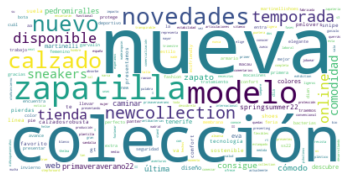

In [217]:
from wordcloud import WordCloud
wordcloud = WordCloud(collocations = False, background_color = 'white').generate(preprocesamiento_nube(tin))
%pylab inline
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('gráfico.png')

### INNOVACIÓN POR CUENTAS

In [6]:
cuentas = ['JomaSport', 'panter_calzado', 'Callaghan_Shoes', 'Pikolinos', 'CalzadoPitillos','MAGRITshoes',
           'CalzadosRobusta','DianCalzado','FalSeguridad','pmcalzado','AlpeWomanShoes','DrCutillas',
           'MartinelliShoes','snipe_shoes','GARVALIN', 'NaturalWorldEco','DAngelaShoes','LuisGonzaloShoe',
          'CalzadosSegarra', 'calzadomiralles']

In [7]:
x['text']

0      ¿Y si por #SanValentín le envías esta imagen a...
1      RT @bbmarathon: Seguimos con buenas noticias 🤩...
2      😍 #JomaTeam \n#SoloporDeporte https://t.co/8Aq...
3      @MXiaoPodium @rfetm_tenismesa @galiadvorak Fue...
4      PODIO!!!!\n\n#JomaTeam #ElCorazónDeEspaña http...
                             ...                        
995    Zapatillas súper bonitas de @doctorcutillas de...
996    All you need is love 🎤 ❤\n\n¿Cuál es para ti l...
997    ¿Zapatos para pies con juanetes, dedos de mart...
998    Te vas a poner las #botas\n\n#calzadosmiralles...
999    ¡Buenos días por la mañana!\n\nHoy os comparti...
Name: text, Length: 1000, dtype: object

In [261]:
d = {}
for cuenta in cuentas:
    suma = 0
    for n,i in enumerate(x['cuenta']):
        if i == cuenta and x['innov'][n] == 1:
            suma += 1
    d.update({cuenta:suma})
    
    

In [262]:
from collections import OrderedDict
p = {}
for i in d.items():
    p.update({i[0] :(i[1] * 100)/50})
    
sortedDict = OrderedDict(sorted(p.items(), key=lambda x: x[1], reverse = True))
d = sortedDict

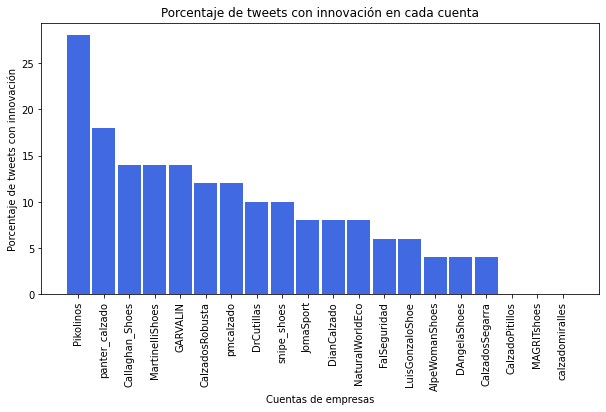

In [12]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset

courses = list(d.keys())
values = list(d.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='#4169E1',
		width = 0.9)

plt.xlabel("Cuentas de empresas")
plt.ylabel("Porcentaje de tweets con innovación")
plt.title("Porcentaje de tweets con innovación en cada cuenta")
plt.xticks(rotation = 90)
plt.show()



In [141]:
### Algunas librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
 
from pylab import rcParams
 
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
 
from collections import Counter

from sklearn.model_selection import train_test_split 
from sklearn.metrics import f1_score, accuracy_score
import re
import string
import emoji
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

In [685]:
df['text']

0    RT @YorokobuMag: De lejos parece asqueroso, pe...
1    La nueva colección está repleta de modelos ver...
2                          😍😍😍 https://t.co/AVeWZCSV1K
3    La belleza de la fabricación artesanal https:/...
4    La primera comunión es un acontecimiento único...
Name: text, dtype: object